In [3]:
 %pip install Prophet

     --------------------------------------- 12.1/12.1 MB 59.4 MB/s eta 0:00:00
     ---------------------------------------- 73.9/73.9 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=1.0.4 in c:\users\user\anaconda3\lib\site-packages (from Prophet) (1.4.3)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path ="C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [3]:
pweb = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)

In [4]:
pweb = pweb[pweb['hit'].notnull()]

print(pweb.head())
print(pweb.tail())

             hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0
               hit
date              
17. 6. 26.  1309.0
17. 6. 27.  1436.0
17. 6. 28.  1387.0
17. 6. 29.  1328.0
17. 6. 30.  1193.0


In [94]:
pweb

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


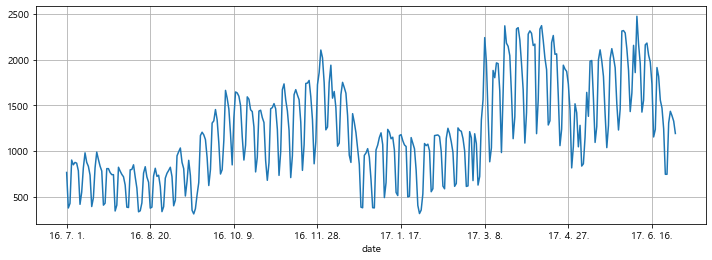

In [6]:
pweb['hit'].plot(figsize=(12,4), grid=True);

In [8]:
time = np.arange(0, len(pweb))
traffic = pweb['hit'].values

fx = np.linspace(0, time[-1], 1000)
print(fx)

[  0.           0.36436436   0.72872873   1.09309309   1.45745746
   1.82182182   2.18618619   2.55055055   2.91491491   3.27927928
   3.64364364   4.00800801   4.37237237   4.73673674   5.1011011
   5.46546547   5.82982983   6.19419419   6.55855856   6.92292292
   7.28728729   7.65165165   8.01601602   8.38038038   8.74474474
   9.10910911   9.47347347   9.83783784  10.2022022   10.56656657
  10.93093093  11.2952953   11.65965966  12.02402402  12.38838839
  12.75275275  13.11711712  13.48148148  13.84584585  14.21021021
  14.57457457  14.93893894  15.3033033   15.66766767  16.03203203
  16.3963964   16.76076076  17.12512513  17.48948949  17.85385385
  18.21821822  18.58258258  18.94694695  19.31131131  19.67567568
  20.04004004  20.4044044   20.76876877  21.13313313  21.4974975
  21.86186186  22.22622623  22.59059059  22.95495495  23.31931932
  23.68368368  24.04804805  24.41241241  24.77677678  25.14114114
  25.50550551  25.86986987  26.23423423  26.5985986   26.96296296
  27.3273273

In [10]:
# 평균제곱 오차(mean squared error, mse)
# dhck = (예측값 = 실제값) ** 2
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [18]:
# polyfit() 함수는 입력과 출력 값으로부터 다항성의 계수를 찾아주는 함수
# polyfit(x, y, n)

fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
print(f1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

 
2.948 x + 678.4
430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


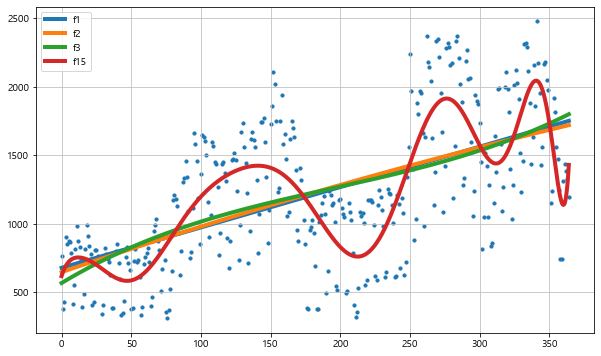

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [21]:
df = pd.DataFrame({'ds': pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [22]:
# df['ds'] 생성했으므로  date 삭제
del df['date']

In [23]:
# Prophet() 함수를 사용시
# 주기성이 연단위 (yearly_seasonality) 및 일단위(daily_seasonality)가 있다.
# Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

15:07:05 - cmdstanpy - INFO - Chain [1] start processing
15:07:05 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# 16. 7. 1.~17. 6. 30.홈페이지 방문자 수
# make_future_dataframe: 예측 날짜 구간 생성

future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [26]:
# predict: 신뢰 구간을 포함한 예측 실행한 데이터를 forecast 변수에 저장

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # 예측, 예측 하한, 예측 상한

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,929.867791,701.675910,1136.335079
421,2017-08-26,514.867857,303.139710,715.554064
422,2017-08-27,647.321299,450.235375,852.450103
423,2017-08-28,1199.874346,981.048884,1408.915160
424,2017-08-29,1235.657578,1048.169322,1458.020424


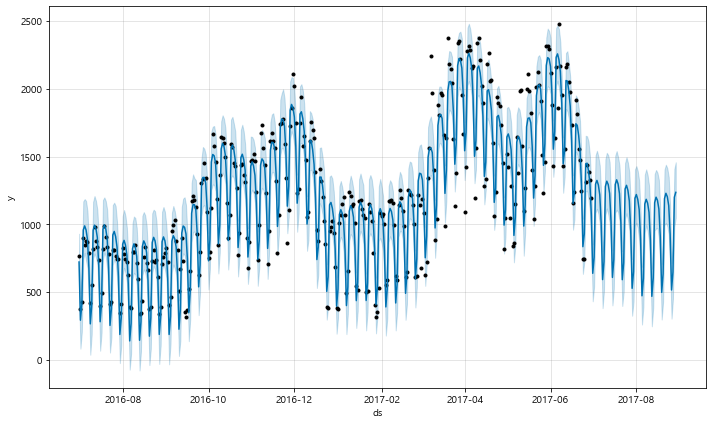

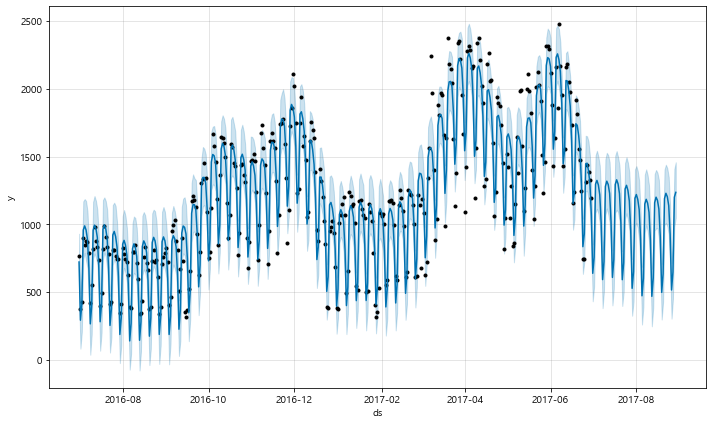

In [28]:
m.plot(forecast)

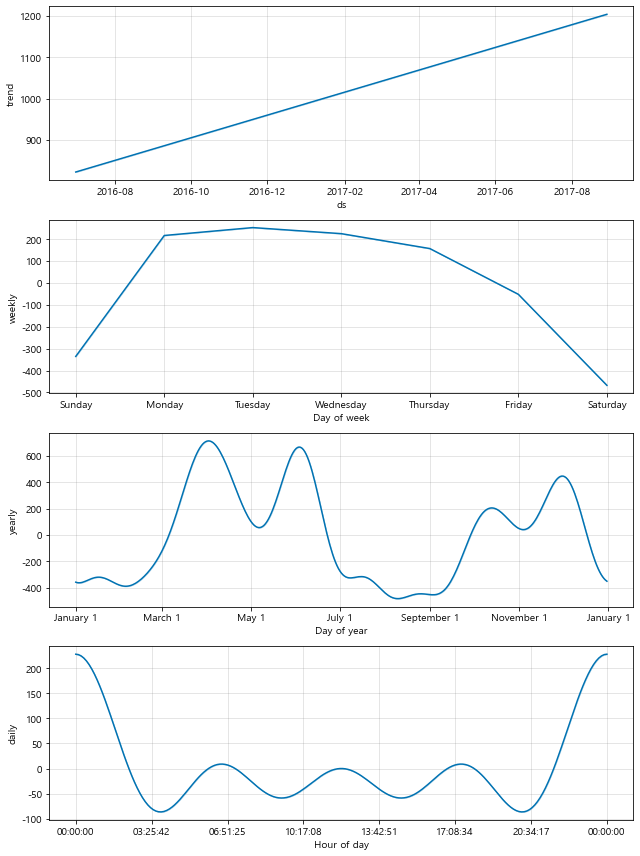

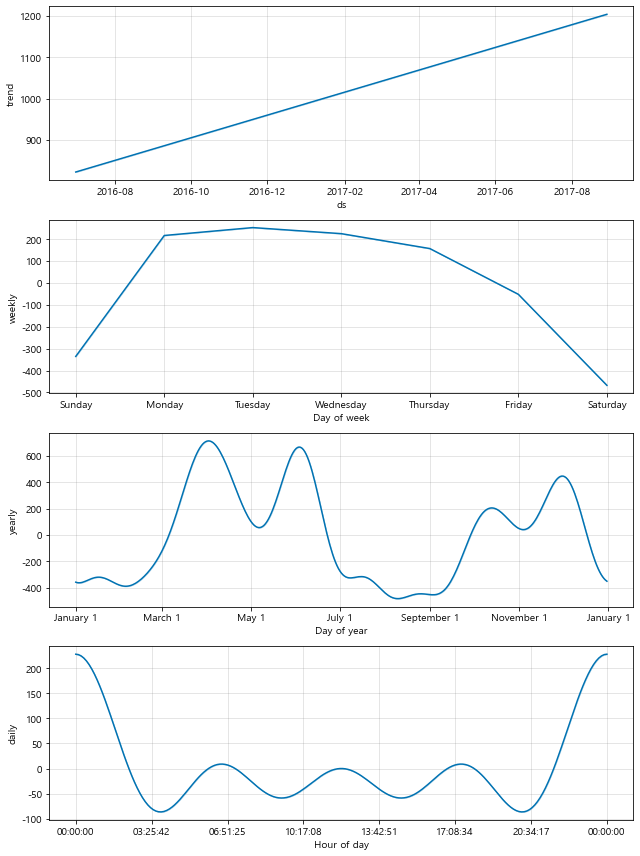

In [32]:
m.plot_components(forecast)

# Seasonal 시계열 분석으로 주식 데이터 분석
## Python 3.6에서는 DataReader의 web를 통해 구글과 야후 파이낸스 주식 자료를 뽑아쓰는  API가 막힘
* 야후 fix_yahoo_finance() 참고해서 작성
* 위의 경우 web.DataReader가 아닌, data.get_data_yahoo라는 메소드를 써야 함.

In [33]:
from pandas_datareader import data

In [36]:
# yahoo
start = datetime(2020, 1, 1)
end = datetime(2020, 6, 2)

# df = data.get_data_yahoo('KS11', start, end)
df = data.DataReader('^KS11', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


In [43]:
import prophet
print(prophet.__version__)
import pandas 
print(pandas.__version__)

1.0
1.4.3


In [59]:
start_date = '2009-7-1'
end_data = '2019-7-31'
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) # 삼성
SAM_trunc = SAM[:'2017-6-30']
SAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9515.538086
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9499.759766
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9483.980469
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10004.733398
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10257.216797


In [52]:
start_date = '2009-7-1'
end_data = '2019-7-31'
KAKAO = data.get_data_yahoo('035720.KS', start, end) # 삼성
KAKAOtrunc = KAKAO[:'2017-6-30']
KAKAO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,31127.228516,30623.552734,31026.494141,30724.287109,1196436,30697.785156
2020-01-03,31227.964844,30422.082031,30925.757812,30724.287109,1562748,30697.785156
2020-01-06,31227.964844,30220.611328,30321.345703,31127.228516,1954204,31100.376953
2020-01-07,32235.318359,31127.228516,31227.964844,32235.318359,4170263,32207.511719
2020-01-08,32638.259766,31530.169922,31933.111328,32134.582031,4227010,32106.861328


In [48]:
start_date = '2009-7-1'
end_data = '2019-7-31'
df = data.DataReader('000270.KS', 'yahoo', start, end) # 삼성
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,44300,42300,44100,42500,1355029,40338.398438
2020-01-03,42900,41500,42600,42000,1569720,39863.828125
2020-01-06,41950,41350,41350,41900,830880,39768.917969
2020-01-07,42300,41550,41900,42050,1124218,39911.289062
2020-01-08,41900,41100,41300,41300,997335,39199.433594


In [57]:

start_date = '2009-7-1'
end_data = '2019-7-31'
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) # 삼성
SAM_trunc = SAM[:'2017-6-30']
SAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9515.539062
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9499.760742
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9483.980469
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10004.730469
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10257.215820


<AxesSubplot:xlabel='Date'>

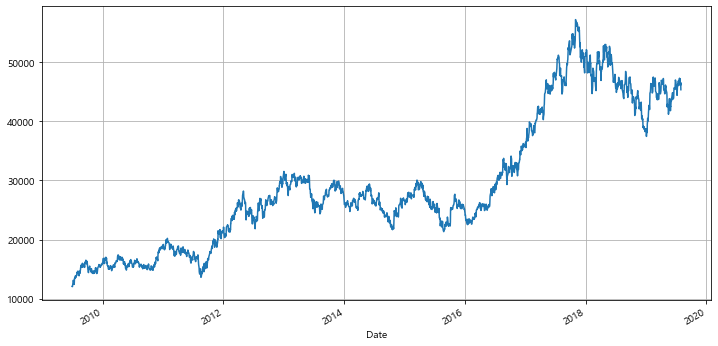

In [60]:
SAM['Close'].plot(figsize=(12, 6), grid=True)

In [61]:
SAM_trunc = SAM[:'2016-12-31']
SAM_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9515.538086
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9499.759766
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9483.980469
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10004.733398
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10257.216797
...,...,...,...,...,...,...
2016-12-23,36080.0,35600.0,36020.0,35640.0,8334850.0,30298.896484
2016-12-26,36000.0,35560.0,35600.0,35960.0,4823600.0,30570.933594
2016-12-27,36200.0,35860.0,35980.0,35980.0,4653450.0,30587.937500


In [64]:
df = pd.DataFrame({'ds': SAM_trunc.index, 'y': SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2009-07-01,12060.0
1,2009-07-02,12040.0
2,2009-07-03,12020.0
3,2009-07-06,12680.0
4,2009-07-07,13000.0


In [65]:
# 주기성이 일단위(daily_seasonality)로 있다고 알려줌

m = Prophet(daily_seasonality = True)
m.fit(df)

16:03:18 - cmdstanpy - INFO - Chain [1] start processing
16:03:19 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
# 1년(365일) 후 주가 예측
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2223,2017-12-25
2224,2017-12-26
2225,2017-12-27
2226,2017-12-28
2227,2017-12-29


In [68]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2223,2017-12-25,38629.756408,35255.727167,41998.259368
2224,2017-12-26,38619.240282,35286.008475,42034.906472
2225,2017-12-27,38554.774256,35182.053359,41939.474537
2226,2017-12-28,38525.256565,35257.041378,42047.213108
2227,2017-12-29,38433.431775,34678.729677,41936.489196


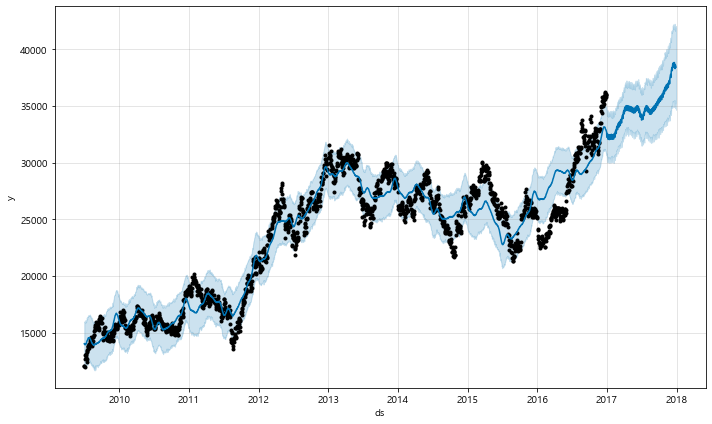

In [71]:
m.plot(forecast);

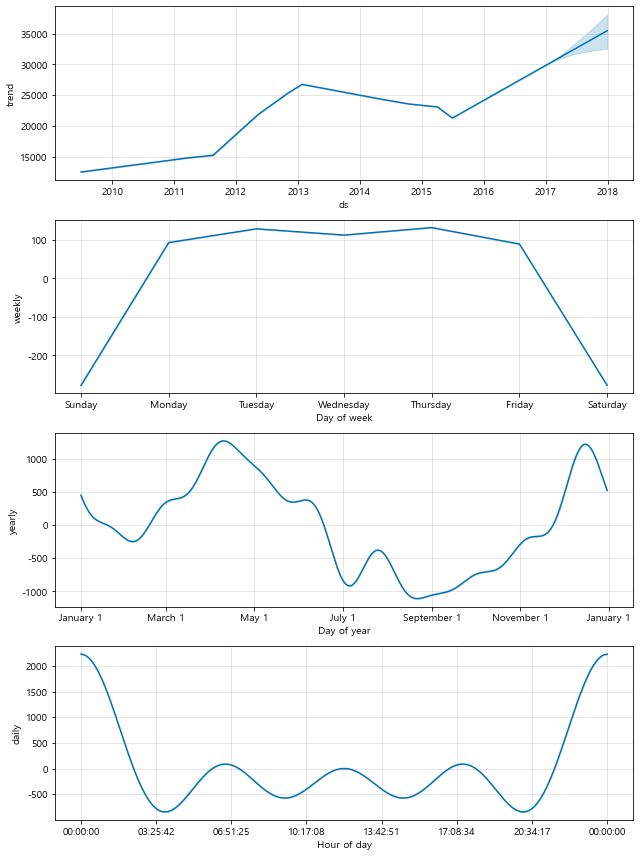

In [73]:
m.plot_components(forecast);

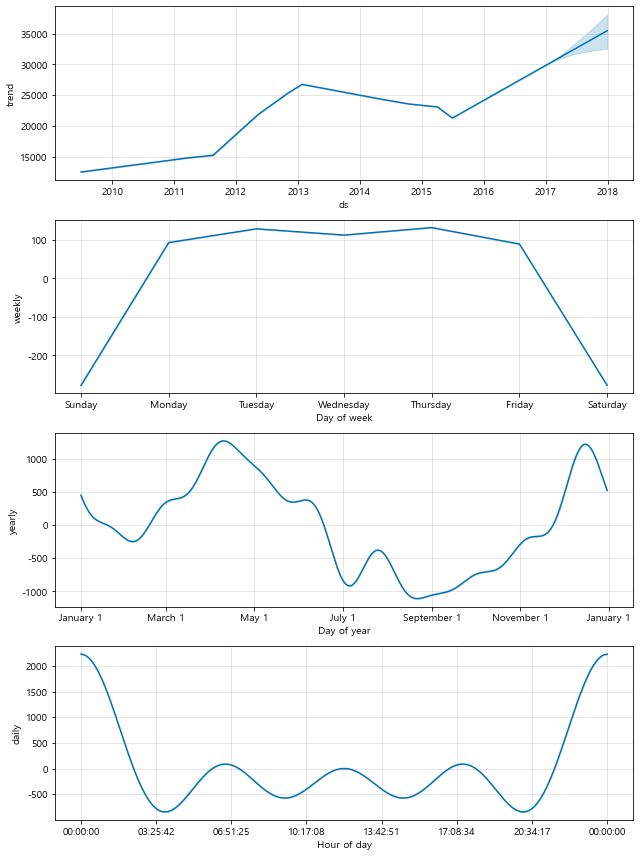

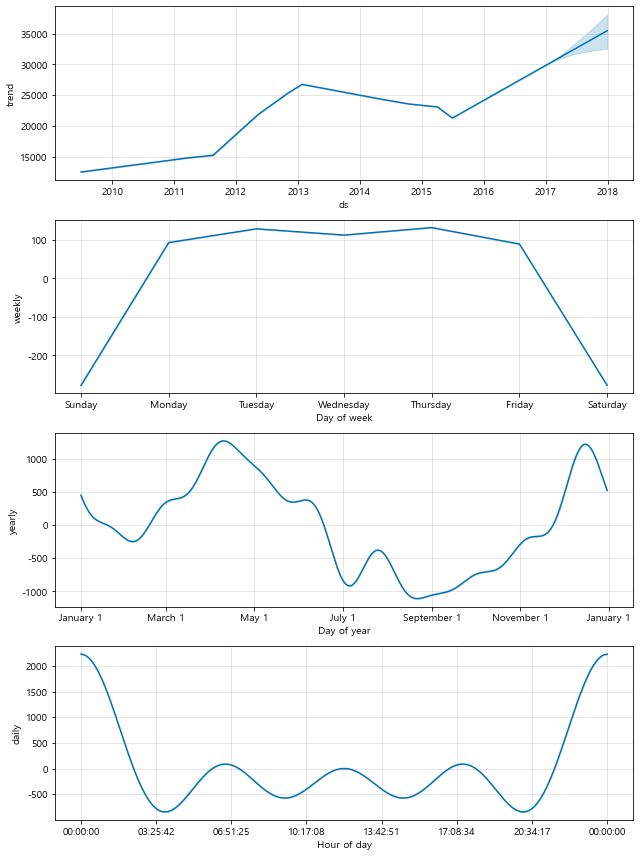

In [74]:
m.plot_components(forecast)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,27100.0,26040.0,26960.0,26180.0,31025000.0,21548.599609
2014-01-03,26220.0,25740.0,26000.0,25920.0,26496600.0,21334.597656
2014-01-06,26400.0,25920.0,26060.0,26140.0,19735800.0,21515.679688
2014-01-07,26360.0,25900.0,26000.0,26080.0,19763200.0,21466.292969
2014-01-08,26080.0,25740.0,26000.0,25820.0,20474650.0,21252.289062
...,...,...,...,...,...,...
2016-12-23,36080.0,35600.0,36020.0,35640.0,8334850.0,30298.894531
2016-12-26,36000.0,35560.0,35600.0,35960.0,4823600.0,30570.937500
2016-12-27,36200.0,35860.0,35980.0,35980.0,4653450.0,30587.943359


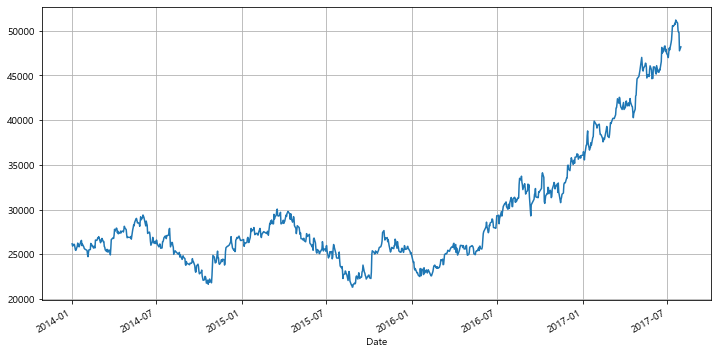

In [75]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);
SAM_trunc = SAM[:'2016-12-31'] #'2009-7-1'  ~ '2016-12-31'
SAM_trunc


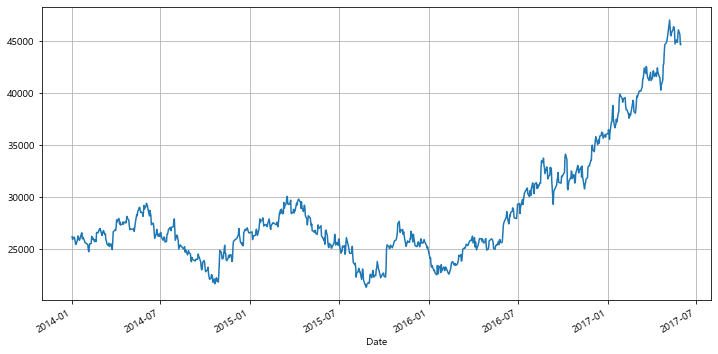

In [76]:
#일부 데이터를 잘라서 forecast를 수행 ==>  '2014-1-1'  ~ '2017-7-31'
SAM_trunc = SAM[:'2017-05-31']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [77]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [78]:
# 주기성 일 단위
m = Prophet(daily_seasonality=True)
m.fit(df)

16:15:04 - cmdstanpy - INFO - Chain [1] start processing
16:15:05 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


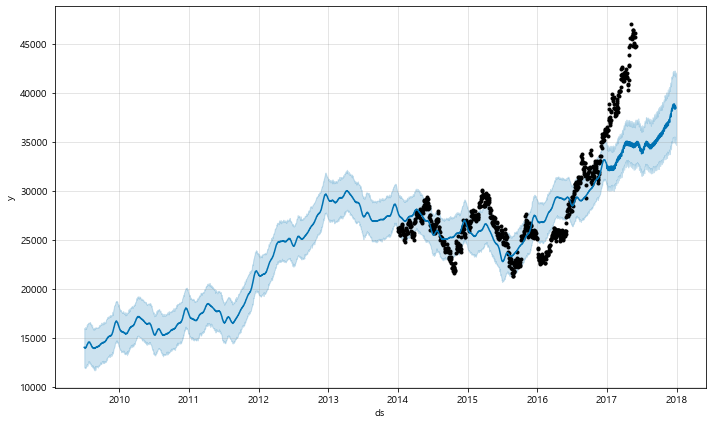

In [81]:
future = m.predict(future)
m.plot(forecast);

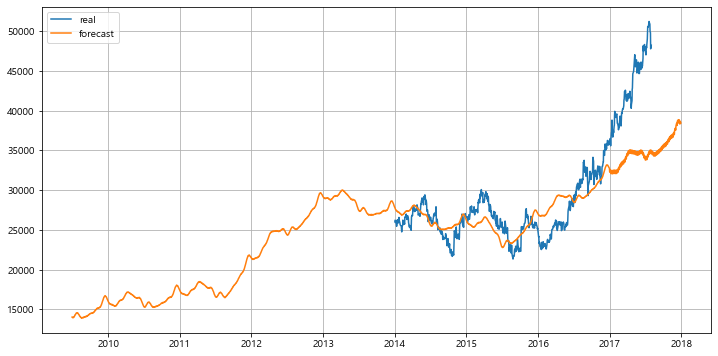

In [83]:
plt.figure(figsize=(12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [86]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [87]:
df['cap'] = 8.5
df['floor'] = 6

In [89]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

16:34:29 - cmdstanpy - INFO - Chain [1] start processing
16:34:30 - cmdstanpy - INFO - Chain [1] done processing


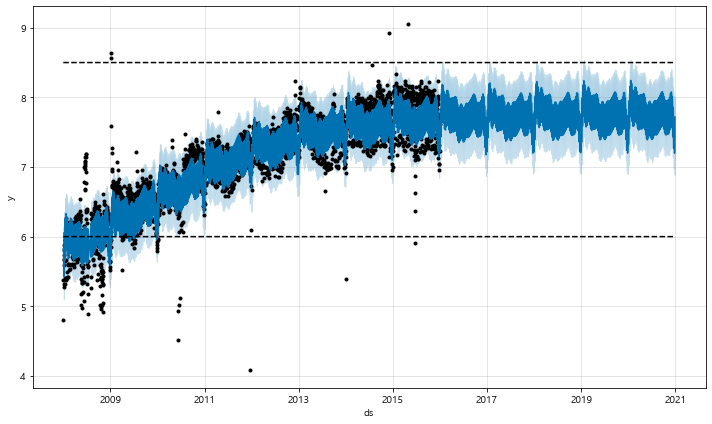

In [92]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5 # 상한값
future['floor'] = 6
fcst = m.predict(future)
m.plot(fcst);

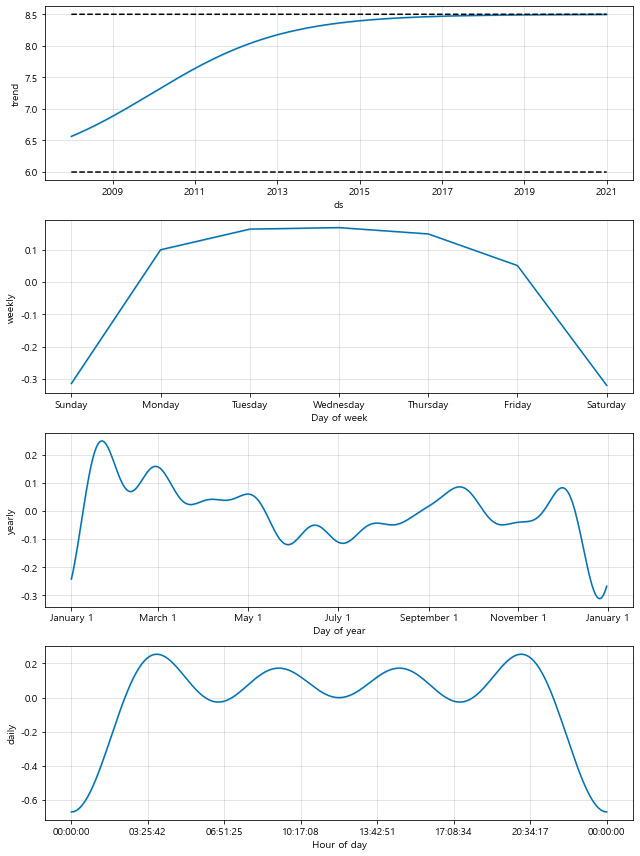

In [93]:
forecast = m.predict(future)
m.plot_components(forecast);